# Project: Investigate Movie Dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>    
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#beda">Basic Exploratory Data Analysis</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected Movie dataset, it just sounds interesting to know the amount of money the Director/Producer have earned throughout the year.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
movie_df = pd.read_csv('tmdb-movies.csv')

<a id='intro'></a>
### Shape

> There are 10866 movies in the dataset and there are 21 characteristics of each movie.

In [5]:
movie_df.shape

(10866, 21)

<a id='intro'></a>
### Info

> There are null values in many of the columns

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='intro'></a>
### Brief Window

> Small view of the dataset that we will be working on

In [7]:
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Description of the Columns and values
<ul>
    <li>id - Movie ID</li>
    <li>imdb_id - IMDB's Movie ID</li>
    <li>Popularity - It is the Percentage value of how many people liked it</li>
    <li>budget - Budget of the Movie in dollars</li>
    <li>revenue - Revenue of the movie made until now</li>
    <li>original_title - Movie title</li>
    <li>cast - Actors of the movie</li>
    <li>homepage - Website link of the movie</li>
    <li>director - Direction Role</li>
    <li>tagline - Tag Line of the movie</li>
    <li>keywords - Key words</li>
    <li>overview - Overview</li>
    <li>runtime - Runtime in minutes</li>
    <li>genres - Genres like Action, Comedy etc.</li>
    <li>production_companies - Companies who invested the movie</li>
    <li>release_date - Date of release</li>
    <li>vote_count - Count of people who voted for it</li>
    <li>vote_average - Rating of the movie</li>
    <li>release_year - Year of release</li>
    <li>budget_adj - Adjusted budget as of 2010</li>
    <li>revenue_adj - Adjested revenue as of 2010</li>
</ul>

In [8]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
> Let's clean the dataset so that the focus can be more on important ones

#### Dropping the colmns that don't add to value

<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>release_date</li>
    <li>overview</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
</ul>

In [9]:
movie_df.drop(columns=['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [10]:
movie_df.shape

(10866, 15)

In [11]:
movie_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### Dropping Null values
> There were plenty of movie details such as Director, Cast, Genres & production_companies that were not present, so dropping them

In [12]:
movie_df[movie_df.cast.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 371 to 10754
Data columns (total 15 columns):
id                      76 non-null int64
popularity              76 non-null float64
budget                  76 non-null int64
revenue                 76 non-null int64
original_title          76 non-null object
cast                    0 non-null object
director                70 non-null object
keywords                45 non-null object
runtime                 76 non-null int64
genres                  75 non-null object
production_companies    36 non-null object
release_date            76 non-null object
vote_count              76 non-null int64
vote_average            76 non-null float64
release_year            76 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 9.5+ KB


In [13]:
movie_df[movie_df.director.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 532 to 10426
Data columns (total 15 columns):
id                      44 non-null int64
popularity              44 non-null float64
budget                  44 non-null int64
revenue                 44 non-null int64
original_title          44 non-null object
cast                    38 non-null object
director                0 non-null object
keywords                16 non-null object
runtime                 44 non-null int64
genres                  42 non-null object
production_companies    21 non-null object
release_date            44 non-null object
vote_count              44 non-null int64
vote_average            44 non-null float64
release_year            44 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 5.5+ KB


In [14]:
movie_df[movie_df.genres.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 424 to 10659
Data columns (total 15 columns):
id                      23 non-null int64
popularity              23 non-null float64
budget                  23 non-null int64
revenue                 23 non-null int64
original_title          23 non-null object
cast                    22 non-null object
director                21 non-null object
keywords                5 non-null object
runtime                 23 non-null int64
genres                  0 non-null object
production_companies    9 non-null object
release_date            23 non-null object
vote_count              23 non-null int64
vote_average            23 non-null float64
release_year            23 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.9+ KB


#### As per above details, am dropping the NaN entries from Cast, director, genres. Keywords, Production Companies too have NaN data but I am going to have them as it is possible to have NaN data in them

In [15]:
movie_df.dropna(subset = ['cast', 'director', 'genres'], inplace=True)
movie_df.drop_duplicates(inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


Not possible that someone can make a movie with 0 budget, marking them as NaN would be better

In [16]:
movie_df.query('budget==0').head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015


A movie with Revenue as 0, cannot have a max popularity of 8.4 and Max vote average of 9.2, hence it is certain that the data wasn't collected properly, hence marking it as NaN would be a good option to choose

In [17]:
movie_df.query('revenue==0')[['popularity', 'vote_average']].describe()

,popularity,vote_average
count,5888.000000,5888.000000
mean,0.328788,5.813077
std,0.304551,1.001149
min,0.000188,1.500000
25%,0.150058,5.200000
50%,0.265119,5.900000
75%,0.421024,6.500000
max,8.411577,9.200000


A Movie with Runtime as 0 cannot have Max Budget of 6,000,000 USD and cannot have a vote count of max 80, hence it is certain that the data was not collected properly, hence marking it as NaN would be better

In [18]:
movie_df.query('runtime==0')[['budget', 'revenue', 'popularity', 'production_companies', 'vote_count']].describe()

,budget,revenue,popularity,vote_count
count,2.800000e+01,28.0,28.000000,28.000000
mean,4.017857e+05,0.0,0.192495,20.964286
std,1.305862e+06,0.0,0.350403,16.012685
min,0.000000e+00,0.0,0.006440,10.000000
25%,0.000000e+00,0.0,0.037320,11.750000
50%,0.000000e+00,0.0,0.096019,14.500000
75%,0.000000e+00,0.0,0.178342,24.500000
max,6.000000e+06,0.0,1.876037,80.000000


Movie "Mr. Holmes" made a box office collection of 2.94 Crores USD, and had a budget of 1 Crore USD, hence it is obvious that this value is not populated in the Dataset and hence marking them as NaN would be better than removing as it adds to some value

In [19]:
movie_df['budget'].replace(0, np.NaN, inplace=True)
movie_df['revenue'].replace(0, np.NaN, inplace=True)
movie_df['runtime'].replace(0, np.NaN, inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10703 non-null float64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(5), int64(3), object(7)
memory usage: 1.3+ MB


<a id='beda'></a>
## Basic Exploratory Data Analysis

In [20]:
def highest(column):
    index = movie_df[column].idxmax
    info = pd.DataFrame(movie_df.loc[index])
    return info

In [21]:
def lowest(column):
    index = movie_df[column].idxmin
    info = pd.DataFrame(movie_df.loc[index])
    return info

### Research Question 1: Movie releases on a yearly basis
Very clear that the movie releases increases every year

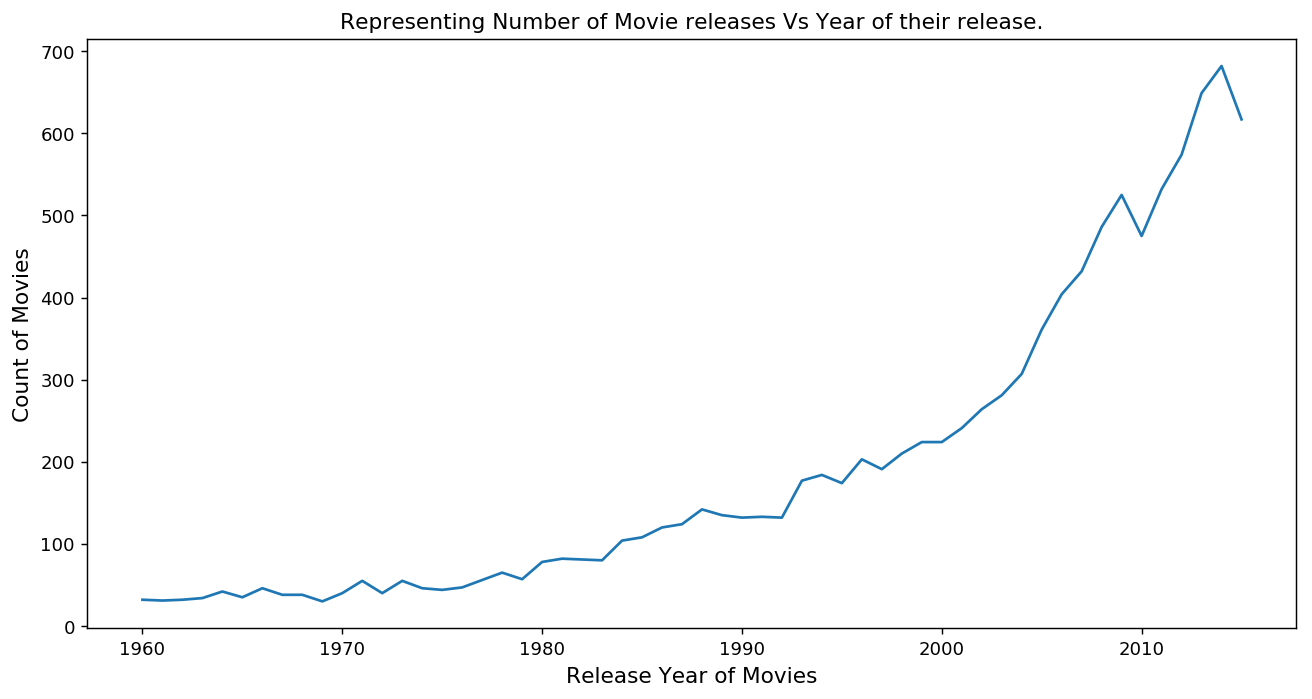

In [22]:
stats = movie_df.groupby('release_year')['id'].count()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Count of Movies', fontsize = 12)
plt.title('Representing Number of Movie releases Vs Year of their release.')

plt.plot(stats);

### Research Question 2:  Highest Budget Movie

In [23]:
highest('budget').loc[['original_title', 'director', 'cast', 'budget']]

,2244
original_title,The Warrior's Way
director,Sngmoo Lee
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
budget,4.25e+08


### Research Question 3:  Lowest Budget Movie

In [24]:
lowest('budget').loc[['original_title', 'director', 'cast', 'budget']]

,1151
original_title,Fear Clinic
director,Robert Hall
cast,Thomas Dekker|Robert Englund|Cleopatra Coleman...
budget,1


### Research Question 4:  Highest Revenue Movie

In [25]:
highest('revenue').loc[['original_title', 'director', 'cast', 'revenue']]

,1386
original_title,Avatar
director,James Cameron
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
revenue,2.78151e+09


### Research Question 5:  Lowest Revenue Movie

In [26]:
lowest('revenue').loc[['original_title', 'director', 'cast', 'revenue']]

,5067
original_title,Shattered Glass
director,Billy Ray
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
revenue,2


### Research Question 6:  Best All Rounder Movie

Adding a new column that would contain the profit value

In [27]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
movie_df['loss'] = movie_df['budget'] - movie_df['revenue']

In [28]:
highest('profit').loc[['original_title', 'director', 'cast', 'profit']]

,1386
original_title,Avatar
director,James Cameron
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
profit,2.54451e+09


### Research Question 7:  Poorly Performed Movie

In [29]:
highest('loss').loc[['original_title', 'director', 'cast', 'loss']]

,2244
original_title,The Warrior's Way
director,Sngmoo Lee
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
loss,4.13912e+08


<a id='eda'></a>
## Advanced Exploratory Data Analysis

In [30]:
def get_series(column):
    concat_str = movie_df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

### Research Question 1:  Cast Frequency Trend

In [31]:
cast_top_10 = get_series('cast').value_counts().head(10)

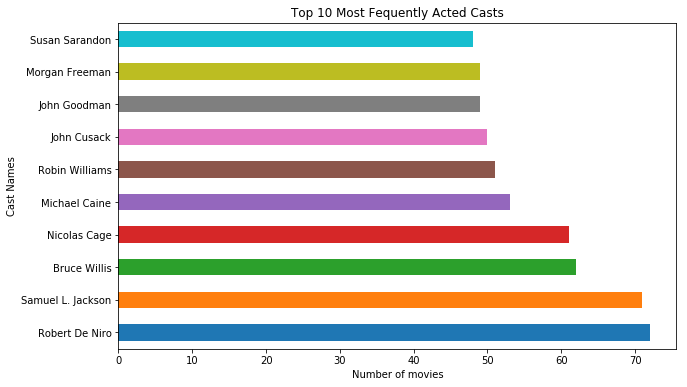

In [74]:
plt = cast_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Acted Casts')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

### Research Question 2:  Keyword Frequency Trend

In [70]:
keyword_top_10 = get_series('keywords').value_counts().head(10)

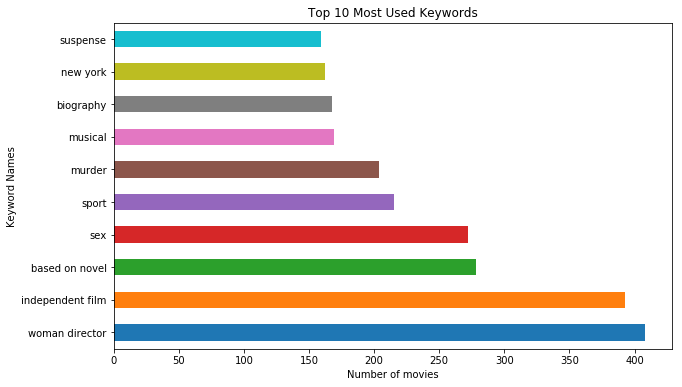

In [75]:
plt = keyword_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Used Keywords')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Keyword Names');
plt.figure.set_size_inches(10, 6)

### Research Question 3:  Genre Frequency Trend

In [77]:
genre_top_10 = get_series('genres').value_counts().head(10)

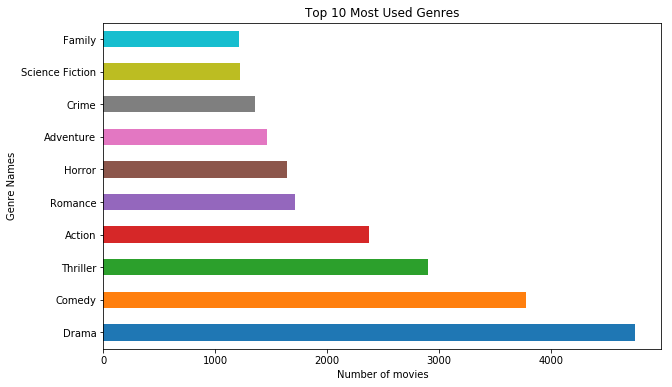

In [78]:
plt = genre_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Used Genres')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Genre Names');
plt.figure.set_size_inches(10, 6)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!